# 🚢 Task 2: Titanic Dataset Analysis

#### 📥 Importing Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### 🚢 Loading the Titanic Dataset 

In [4]:
df=sns.load_dataset("Titanic")

#### 📂 Preview of Dataset (First 5 Rows)

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 📊 Displaying Information of Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


>**The dataset has 891 passengers with 15 variables on demographics, travel, and survival. Some columns have missing values, especially age, embarked, and deck (highly sparse).**

#### 🔍 Check for Missing Values of Dataset

In [7]:
df.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

>**Most columns have complete data. `Age` has `20%` missing values, `embarked` and `embark_town` have very few missing entries `0.2%`, and `deck` has `77.2%` missing values, so it will be dropped from the analysis.**

#### 🔢 Passenger Class Distribution 

In [10]:
print(f'The Value count of pclass: {df["pclass"].value_counts()},\n\nValue counts of Class: {df["class"].value_counts()}')

The Value count of pclass: pclass
3    491
1    216
2    184
Name: count, dtype: int64,

Value counts of Class: class
Third     491
First     216
Second    184
Name: count, dtype: int64


>**pclass and class convey the same information. To avoid redundancy, pclass will be dropped and class retained for analysis.**

#### 🔢 Passenger Embarked Distribution 

In [11]:
print(f'The Value count of embarked: {df["embarked"].value_counts()},\n\nValue counts of embarked_town: {df["embark_town"].value_counts()}')

The Value count of embarked: embarked
S    644
C    168
Q     77
Name: count, dtype: int64,

Value counts of embarked_town: embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


>**Since `embarked` and `embark_town` carry the same information, I will drop `embarked` and keep `embark_town` for better clarity and readability in the analysis.**

#### 🔢 Passenger Survival Distribution 

In [12]:
print(f'The Value count of alive: {df["alive"].value_counts()},\n\nValue counts of survived: {df["survived"].value_counts()}')

The Value count of alive: alive
no     549
yes    342
Name: count, dtype: int64,

Value counts of survived: survived
0    549
1    342
Name: count, dtype: int64


>**Since `alive` and `survived` contain the same information, I will drop `alive` and keep `survived` as the primary outcome variable for analysis.**

#### ✂️ Dropping redundant columns 

In [13]:
df.drop(['deck','embarked','pclass','alive'],axis=1,inplace=True)

#### 🔄 Converting Survival Column 

In [14]:
df['survived'] = df['survived'].replace({0: 'No', 1: 'Yes'})

#### 🔄 Converting Alone Column 

In [15]:
df['alone'] = df['alone'].replace({True: 'Yes', False: 'No'})

#### 📊 Calculating Median and Mode 

In [16]:
print(f'The median Values of Age is: {df["age"].median()} \nThe Mode value Embark_town is:{df["embark_town"].mode()[0]} ')

The median Values of Age is: 28.0 
The Mode value Embark_town is:Southampton 


>**We calculate the median age of passengers and the mode of embark_town. These values are useful for imputing missing data in the respective columns.**

#### 🧹 Imputing Missing Age Values 

In [17]:
df['age'].fillna(df['age'].median(),inplace=True)

#### 🧹 Imputing Missing Embarked Town Values 

In [18]:
df['embark_town'].fillna(df['embark_town'].mode(),inplace=True)

#### 👥 Gender Distribution  

In [19]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

>**The dataset contains 577 male passengers and 314 female passengers, indicating that males make up the majority of the sample.**

#### 👥 Class Distribution  

In [20]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

>**The dataset shows that most passengers traveled in Third Class (491), followed by First Class (216) and Second Class (184).**

#### 🙋🏻‍♂️ Survival Distribution  

In [21]:
df['survived'].value_counts()

survived
No     549
Yes    342
Name: count, dtype: int64

>**Out of all passengers, 549 did not survive while 342 survived, showing that the majority of passengers did not survive.**

##### 🧍🏻 ALone Distribution  

In [22]:
df['alone'].value_counts()

alone
Yes    537
No     354
Name: count, dtype: int64

>**The dataset shows that 537 passengers traveled alone, while 354 passengers traveled with family or companions.**

#### 📋 Summary Statistics of Numerical Columns

In [23]:
df.describe()

,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.361582,0.523008,0.381594,32.204208
std,13.019697,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


**Interpretation of that descriptive statistics table:**
* **Age**: Age: Range `0.42–80` years, average `29`, most between `22–35`.
* **SibSp (siblings/spouses aboard)**: Mostly 0, maximum 8, average 0.52.
* **Parch (parents/children aboard)**: Mostly 0, maximum 6, average 0.38.
* **Fare**: Fares varied widely, from `0 to 512.33`, with average of `32.20`. The majority of fares were `below 31`.
While outliers retained as true values.

#### 📊 Counting Survivors by Travel Class

In [24]:
df.groupby('class')['survived'].value_counts()

class   survived
First   Yes         136
        No           80
Second  No           97
        Yes          87
Third   No          372
        Yes         119
Name: count, dtype: int64

**The survival distribution varies across classes:**
* **First Class**: 136 survived, 80 did not.
* **Second Class**: 87 survived, 97 did not.
* **Third Class**: 119 survived, 372 did not.   
**This shows that survival chances were highest in First Class and lowest in Third Class.**

#### 🔄 Plotting Survival Rate by Class

Text(0.5, 1.0, 'Survival Rate by Class')

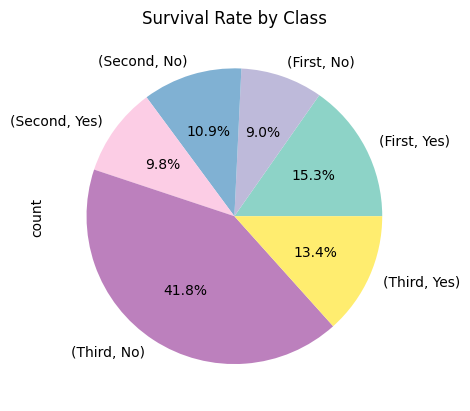

In [57]:
df.groupby('class')['survived'].value_counts().plot(kind='pie',autopct='%1.1f%%',colormap='Set3')
plt.title('Survival Rate by Class')

#### 📊 Plotting Survival Rate by Class

array([0, 1, 2, 3, 4, 5])

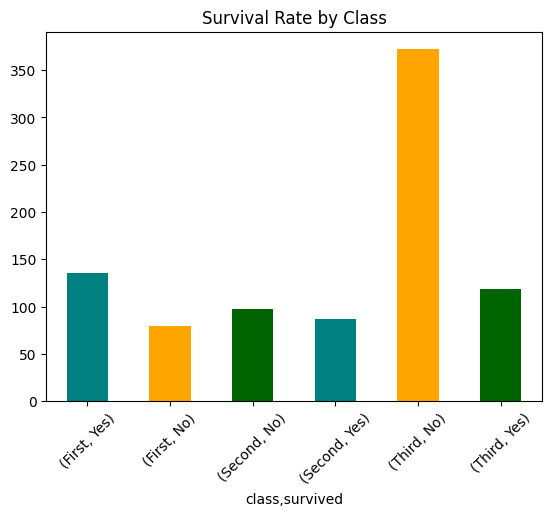

In [34]:
df.groupby('class')['survived'].value_counts().plot(kind='bar',color=['teal','orange','darkgreen'])
plt.title('Survival Rate by Class')
plt.xticks(rotation=45)[0]

#### 📊 Counting Survivors by Gender

In [252]:
df.groupby('sex')['survived'].value_counts()

sex     survived
female  Yes         233
        No           81
male    No          468
        Yes         109
Name: count, dtype: int64

**The survival distribution differs greatly between genders:**
* **Female**: 233 survived, 81 did not.
* **Male**: 109 survived, 468 did not.
* **This shows that females had a much higher survival rate compared to males.**

#### 🔄 Plotting Survival Rate by Gender

Text(0.5, 1.0, 'Survival Rate by Gender')

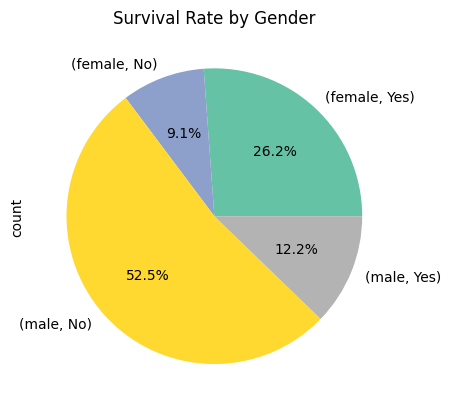

In [339]:
df.groupby('sex')['survived'].value_counts().plot(kind='pie',autopct='%1.1f%%',colormap='Set2')
plt.title('Survival Rate by Gender')

#### 📊 Counting Gender by Travel Class

In [341]:
df.groupby('class')['sex'].value_counts()

class   sex   
First   male      122
        female     94
Second  male      108
        female     76
Third   male      347
        female    144
Name: count, dtype: int64

**The dataset shows how gender is distributed across passenger classes:**
* **First Class**: 122 males, 94 females
* **Second Class**: 108 males, 76 females
* **Third Class**: 347 males, 144 females
* Overall, males outnumber females in every class, with the largest gender gap observed in Third Class.

#### 📊 Plotting Passenger Distribution by Travel Class and Gender

array([0, 1, 2, 3, 4, 5])

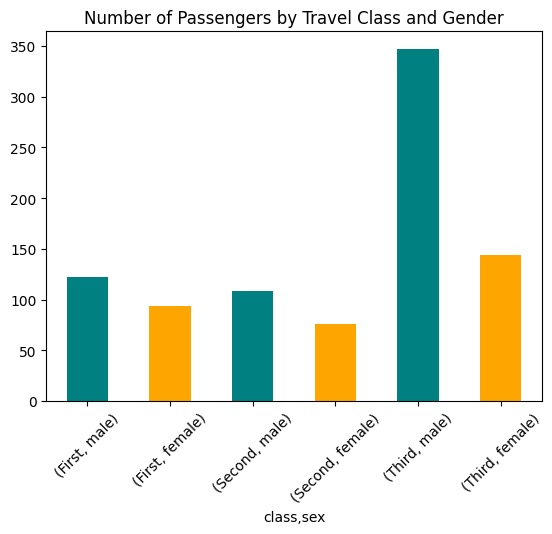

In [42]:
df.groupby('class')['sex'].value_counts().plot(kind='bar',color=['teal','orange'])
plt.title('Number of Passengers by Travel Class and Gender')
plt.xticks(rotation=45)[0]

#### 📊 Counting Alone Passenger by Travel Class

In [257]:
df.groupby('class')['alone'].value_counts()

class   alone
First   Yes      109
        No       107
Second  Yes      104
        No        80
Third   Yes      324
        No       167
Name: count, dtype: int64

The dataset shows the distribution of passengers traveling alone across classes:

* **First Class**: 109 traveled alone, 107 traveled with companions.
* **Second Class**: 104 traveled alone, 80 traveled with companions.
* **Third Class**: 324 traveled alone, 167 traveled with companions.
* This indicates that the majority of passengers in `Third Class` were traveling alone, while `First and Second Class` had a more balanced split.

#### 👤 Plotting Solo vs Group Passengers by Travel Class

array([0, 1, 2, 3, 4, 5])

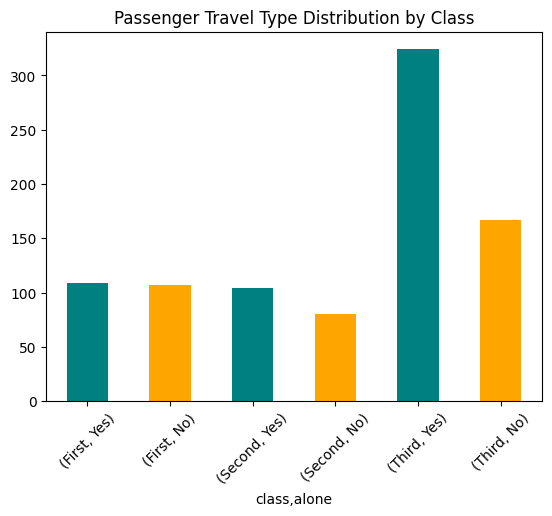

In [48]:
df.groupby('class')['alone'].value_counts().plot(kind='bar',color=['teal','orange'])
plt.title('Passenger Travel Type Distribution by Class')
plt.xticks(rotation=45)[0]

#### 📊 Counting Embark Town by Travel Class

In [272]:
df.groupby('class')['embark_town'].value_counts()

class   embark_town
First   Southampton    127
        Cherbourg       85
        Queenstown       2
Second  Southampton    164
        Cherbourg       17
        Queenstown       3
Third   Southampton    353
        Queenstown      72
        Cherbourg       66
Name: count, dtype: int64

**The dataset shows how passengers from different embarkation towns were distributed across classes:**

* **First Class**: 127 from Southampton, 85 from Cherbourg, 2 from Queenstown.
* **Second Class**: 164 from Southampton, 17 from Cherbourg, 3 from Queenstown.
* **Third Class**: 353 from Southampton, 72 from Queenstown, 66 from Cherbourg.
* `Southampton` was the primary embarkation point for all classes, while `Cherbourg` had more First Class passengers and `Queenstown` contributed mostly Third Class passengers.

#### 📊 Plotting Passenger Distribution by Travel Class and Embarked Town

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

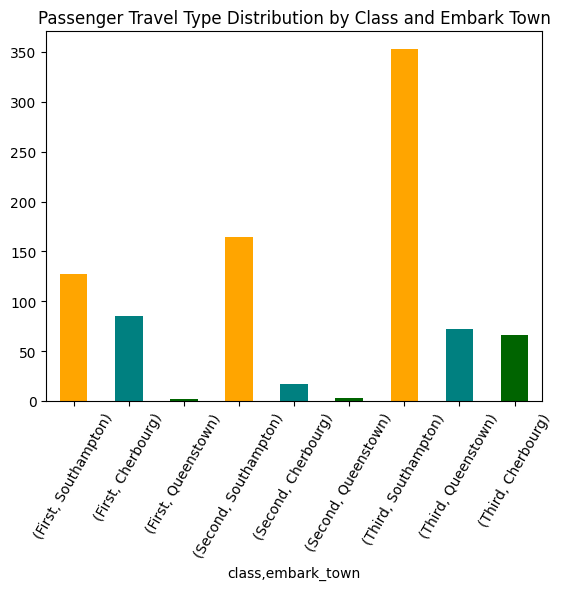

In [54]:
df.groupby('class')['embark_town'].value_counts().plot(kind='bar',color=['orange','teal','darkgreen'])
plt.title('Passenger Travel Type Distribution by Class and Embark Town')
plt.xticks(rotation=60)[0]

#### 🔄 Plotting the Correlation Heatmap

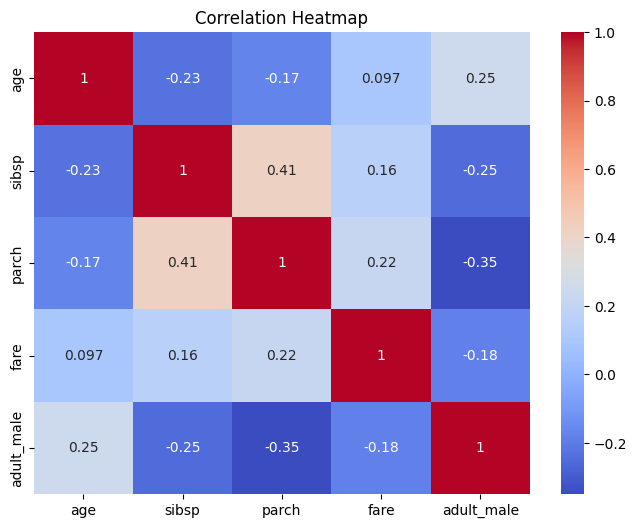

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**The heatmap shows correlations between numerical variables in the dataset:**

* **SibSp & Parch (0.41)**: Moderate positive correlation shows that families often traveled with both siblings/spouses and parents/children.
* **Fare & Parch (0.22), Fare & SibSp (0.16)**: Weak positive correlations shows that larger families tended to pay higher fares.
* **Age & SibSp (-0.23), Age & Parch (-0.17)**: Weak negative correlations shows that younger passengers were more likely to travel with family.
* **Adult_male & Age (0.25)**: Weak positive correlation shows that older passengers were more often adult males.
* **Adult_male & Parch (-0.35)**: Moderate negative correlation shows that adult males were less likely to travel with parents/children.

## **Final Report**
### 1. Data Overview

The dataset contains **891 passenger records** with demographic, travel, and survival information across 15 variables. Data types include numerical, categorical, and boolean values.

---

### 2. Handling Missing Values

* **Age**: \~19.9% missing values. These were imputed to preserve important information.
* **Embarked / Embark\_town**: \~0.22% missing values. Kept `embark_town` (town names) for better interpretability. Missing values were imputed.
* **Deck**: Over 77% missing values. Dropped due to excessive missingness.

---

### 3. Removing Redundant Columns

To reduce duplication and improve clarity:

* Dropped **pclass** (numeric) and kept **class** (categorical).
* Dropped **alive** and kept **survived** as the primary outcome variable.
* Dropped **embarked** and kept **embark\_town** for readability.

---

### 4. Data Distributions and Insights

* **Gender**: 577 males, 314 females. Males form the majority of passengers.
* **Class**: 491 in Third, 216 in First, 184 in Second. Most traveled in Third Class.
* **Survival**: 342 survived, 549 did not. Majority did not survive.
* **Traveling Alone**: 537 traveled alone, 354 traveled with companions.

---

### 5. Descriptive Statistics of Numerical Variables

* **Age**: Mean \~29 years (range 0.42–80). Most passengers aged 22–35.
* **SibSp**: Most had no siblings/spouses aboard; max = 8.
* **Parch**: Most had no parents/children aboard; max = 6.
* **Fare**: Highly variable (0–512). Outliers are present but retained as true values.

---

### 6. Survival Analysis by Groups

* **By Class**:

  * First Class: 136 survived, 80 did not.
  * Second Class: 87 survived, 97 did not.
  * Third Class: 119 survived, 372 did not.
    → Survival rate was highest in First Class, lowest in Third Class.
    → Represented with **pie chart (percentages)** and **bar chart**.

* **By Gender**:

  * Female: 233 survived, 81 did not.
  * Male: 109 survived, 468 did not.
    → Females had a significantly higher survival rate.
    → Represented with **pie chart** and **bar chart**.

* **By Class & Gender**:

  * First: 122 males, 94 females
  * Second: 108 males, 76 females
  * Third: 347 males, 144 females
    → Males outnumbered females across all classes, with the largest gap in Third Class.
    → Shown with **bar chart**.

* **By Class & Alone**:

  * First: 109 alone, 107 not alone
  * Second: 104 alone, 80 not alone
  * Third: 324 alone, 167 not alone
    → Most Third Class passengers traveled alone.
    → Shown with **bar chart**.

* **By Class & Embarkation Town**:

  * First: Southampton (127), Cherbourg (85), Queenstown (2)
  * Second: Southampton (164), Cherbourg (17), Queenstown (3)
  * Third: Southampton (353), Queenstown (72), Cherbourg (66)
    → Southampton was the dominant embarkation point across classes.
    → Shown with **bar chart**.

---

### 7. Correlation Analysis

* Strongest relationship: **SibSp and Parch (0.41)** → families often traveled together.
* Weak positives: Fare vs. Parch (0.22), Fare vs. SibSp (0.16).
* Weak negatives: Age vs. SibSp (-0.23), Age vs. Parch (-0.17).
* **Adult\_male vs. Parch (-0.35)**: Adult males were less likely to travel with children or parents.
* Overall, correlations are weak to moderate, indicating that no single variable dominates survival prediction.
  → Shown with **correlation heatmap**.

---

### 8. Conclusion

The analysis shows that **class, gender, and family status** significantly influenced survival chances. First Class passengers and females had a much higher chance of survival, while Third Class passengers and males were least likely to survive. The majority embarked from Southampton, and many Third Class passengers traveled alone.

The dataset is now cleaned, redundant columns are removed, missing values are handled, and meaningful insights are supported by both statistical summaries and visualizations.
